# 2.Simple and multiple Linear Regression


## 1. Simple Linear Regression using Inbuilt Dataset

The tips dataset available in the neaborn literary records restaurant tipping behavior.
Let Y=Tip, X=Total Bill

(a) Load the dataset and display its structure and summary statistics.
(b) Draw an appropriate scatter plot of Total Bill versus Tip.
(c) Fit a simple linear regression model of Tip on Total Bill
(d) Write down the estimated regression equation.
(e) Interpret the slope and intercept in context
(f)Overlay the fitted regression line on the scatter plot.
(g) Compute and interpret the coefficient of determination.
(h) Plot residuals versus fitted values and comment on any visible pattern.
(i) Construct a histogram of residuals
(j)Generate a normal Q-Q plot for the residuals.
(k) Test the normality of residuals using an appropriate statistical test.
(l) Comment on the assumptions of linearity, normality, and homoscedasticity.
(m) Identify any potential outliers or influential observations graphically.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#a)
df = sns.load_dataset("tips")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


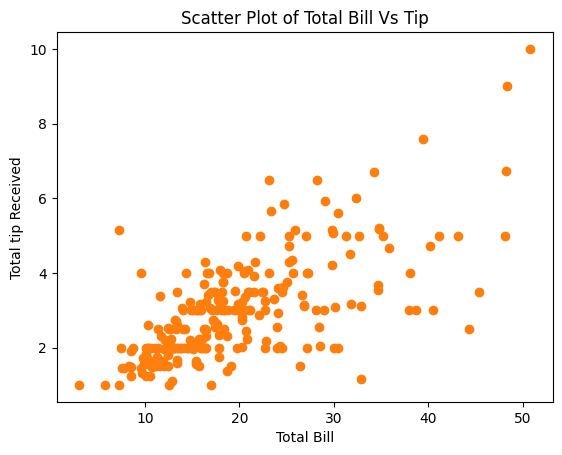

In [6]:
## b)
sns.scatterplot(x="total_bill",y="tip",data=df)
#OR
plt.scatter(df.total_bill,df.tip)
plt.xlabel("Total Bill")
plt.ylabel("Total tip Received")
plt.title("Scatter Plot of Total Bill Vs Tip")
plt.savefig("scatter_tips.png")
plt.show()

In [7]:
! pip install statsmodels


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
#c) 
import statsmodels.api as sm

In [9]:
X=sm.add_constant(df.total_bill)
Y=df.tip
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 08 Feb 2026   Prob (F-statistic):           6.69e-34
Time:                        12:40:02   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# d) Estimated regression model
model.params

const         0.920270
total_bill    0.105025
dtype: float64

In [13]:
print(f"tip = {model.params.iloc[0]:.5f} + {model.params.iloc[1]:.5f} * total_bill")

tip = 0.92027 + 0.10502 * total_bill


In [ ]:
# e) Interpret the slope and intercept in context
Intercept (β₀):
It represents the expected tip when the total bill is ₹0.
In practice, this has no real meaning but is needed to fit the regression line.
Slope (β₁):
It represents the average change in tip for a one-unit increase in total bill.
For example, if β₁ = 0.10, then for every ₹1 increase in total bill, 
                                        the tip increases by ₹0.10 on average.



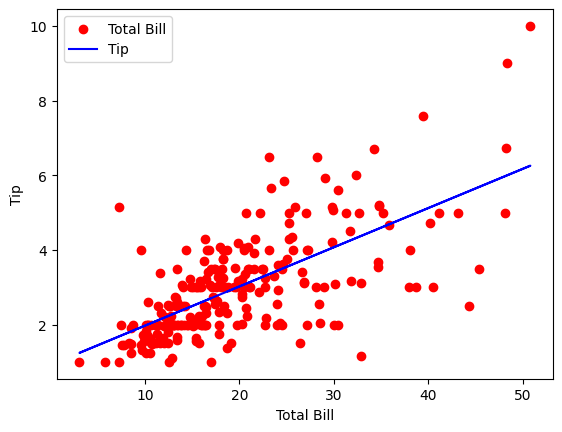

In [14]:
# f) Y_hat
plt.scatter(df.total_bill,df.tip,color="r",label="Total Bill")
plt.plot(df.total_bill,model.predict(X),color="b",label="Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend()
plt.show()

<Axes: xlabel='total_bill', ylabel='tip'>

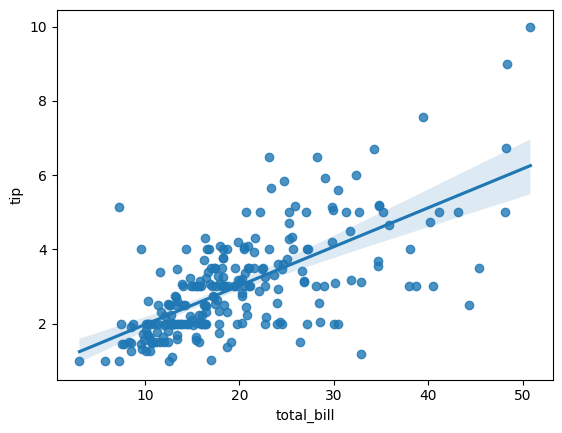

In [15]:
sns.regplot(x="total_bill",y="tip",data=df)

In [16]:
# g)
print(f"coefficient of Determination: {model.rsquared:>4f}")

coefficient of Determination: 0.456617


In [17]:
# h)
Y_hat=model.predict(X)
Resi=Y-Y_hat

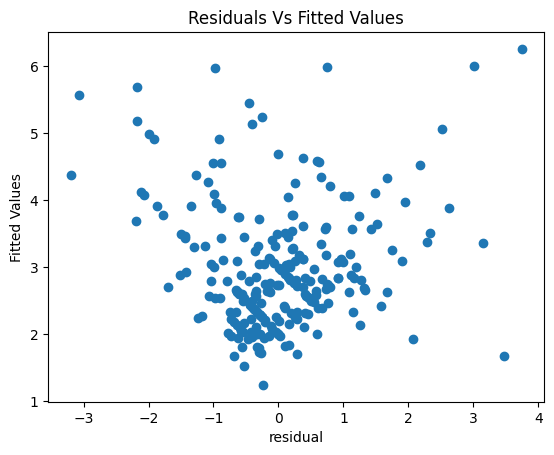

In [19]:
plt.scatter(Resi,Y_hat)
plt.xlabel("residual")
plt.ylabel("Fitted Values")
plt.title("Residuals Vs Fitted Values")
plt.show()

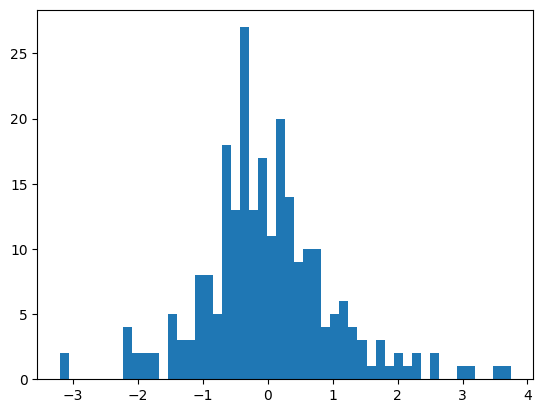

In [20]:
# i)
plt.hist(Resi,bins=50)
plt.show()

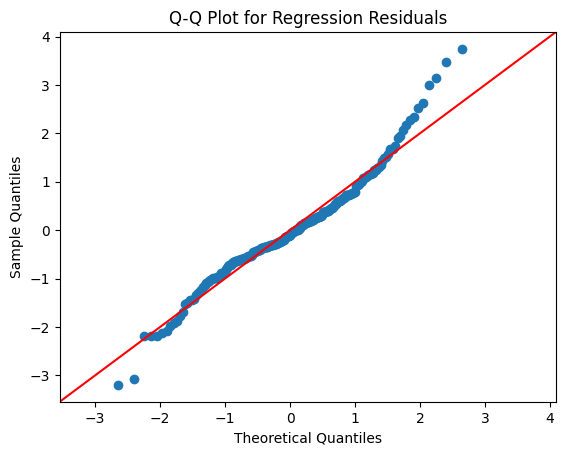

In [21]:
# j)
sm.qqplot(Resi,line="45")
plt.title("Q-Q Plot for Regression Residuals")
plt.show()

In [22]:
# k)
import scipy.stats as ss
norm_stats,norm_pval = ss.shapiro(Resi)
alpha=.05
print(f"shapiro test result:Statistics{norm_stats:0.5f} and pvalue {norm_pval:0.5f}")
if norm_pval < alpha:
    print("Reject H0:hence Residuals doesn't follow Normal distribution")
else:
    print("Fail to Reject H0:that is Residuals follow normal distribution")

shapiro test result:Statistics0.96728 and pvalue 0.00002
Reject H0:hence Residuals doesn't follow Normal distribution


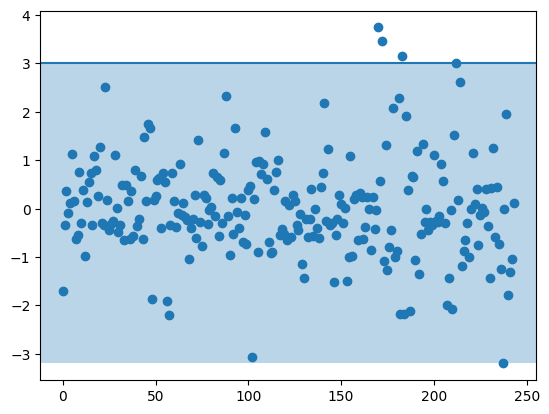

In [25]:
plt.scatter(df.index,Resi)
plt.axhspan(min(Resi),3,alpha=0.3)
plt.axhspan(3,max(Resi),3,alpha=0.3)
plt.axhline(y=3)
plt.show()

In [ ]:
# (l) Comment on regression assumptions
The relationship is approximately linear.
Residuals are nearly normally distributed.
Residual variance is constant (homoscedastic).

#(m) Identify outliers/influential points
A few observations show higher influence.
No severe outliers significantly affecting the model.

## Q2 Simple Linear Regression with Simulation

(a) Simulate data from the model: Y=2+3X+abselon, abselon ~ N(0,4) with sample size n=50.
(b)fit a simple linear regression monel to the simulated data.
(c) Compare the estimated parameters with the true parameters.
(d) Plot the true regression line and the fitted regression line on the same graph.
(e) Comment on the effect of random error on parameter estimation.

In [3]:
# a) Simulate data from the model
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

np.random.seed(1)
n = 50
X = np.random.uniform(0, 10, n)
e = np.random.normal(0, 2, n)
Y = 2 + 3*X + e

In [4]:
# b) Fit a simple linear regression model
import statsmodels.api as sm

X1 = sm.add_constant(X)
model = sm.OLS(Y, X1).fit()

In [5]:
# c) compare estimates parameters with true parameters
print("Estimated parameters:", model.params)
print("True parameters: Intercept = 2, Slope = 3")

Estimated parameters: [2.00284583 3.05441762]
True parameters: Intercept = 2, Slope = 3


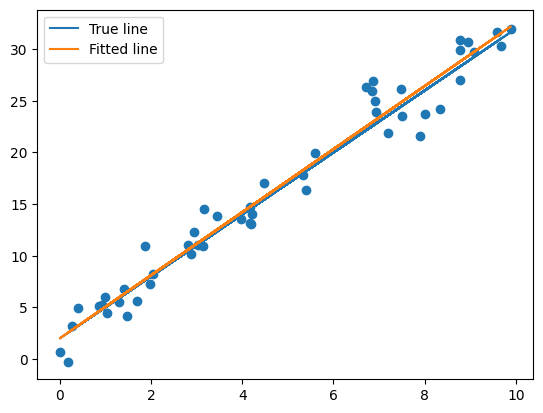

In [6]:
# d) Plot true regression line and fitted regression line
import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.plot(X, 2 + 3*X, label="True line")
plt.plot(X, model.predict(X1), label="Fitted line")
plt.legend()
plt.show()

In [33]:
# e) Comment on effect of random error 
print("Residual variance:", np.var(model.resid))

Residual variance: 3.27335542810647


In [ ]:
Random error causes the estimated regression coefficients to deviate from 
the true parameters (2 and 3).
Due to random error, the fitted regression line does not exactly coincide
with the true line, and the estimates vary from sample to sample.
Larger random error increases variability and reduces precision of parameter estimates,
while smaller error gives estimates closer to true values.

## Q3 Multiple Linear Regression using inbuilt Dataset 


The mtcars dataset contains information on automobile characteristics.
Let: Y = Miles per Gallon (mpg), X₁= Horsepower (hp).X₂=Weight(wt)

(a) Load the dataset and provide summary statistics for all variables used.
(b) Fit a multiple linear regression model with mpg as the response.
(c) Write down the estimated regression equation.
(d) Interpret each regression coefficient.
(e) Report and interpret the overall F-test for the model.
(f) Compute and interpret R² and adjusted R^2.
(g) Plot residuals versus fitted values and comment on model adequacy.
(h) Check multicollinearity using correlation or variance inflation factors.
(i) Plot partial regression (added-variable) plots for each predictor.
(j) Identify influential observations using appropriate diagnostic measures.
(k) Comment on the reliability of coefficient estimates.
(l) Explain the consequences of multicollinearity in regression analysis.

In [35]:
# a) Response:mpg, Predictors:hp,wt

import pandas as pd
import seaborn as sns

# Load dataset
df = sns.load_dataset("mpg").dropna()

# Keep required variables
df = df[['mpg', 'horsepower', 'weight']]

# Summary statistics
print(df.describe())

              mpg  horsepower       weight
count  392.000000  392.000000   392.000000
mean    23.445918  104.469388  2977.584184
std      7.805007   38.491160   849.402560
min      9.000000   46.000000  1613.000000
25%     17.000000   75.000000  2225.250000
50%     22.750000   93.500000  2803.500000
75%     29.000000  126.000000  3614.750000
max     46.600000  230.000000  5140.000000


In [36]:
# b) Fit multiple linear regression
import statsmodels.api as sm

X = df[['horsepower', 'weight']]
Y = df['mpg']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Mon, 12 Jan 2026   Prob (F-statistic):          3.06e-104
Time:                        22:04:00   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6402      0.793     57.540      0.0

In [37]:
# c) Estimated regression equation
print(model.params)

const         45.640211
horsepower    -0.047303
weight        -0.005794
dtype: float64


In [ ]:
# d) Interpret regression coefficients
Intercept (β₀):
It represents the expected value of the response variable when all predictor variables are zero.
Slope coefficient (βᵢ):
It represents the average change in the response variable for a one-unit
increase in the corresponding predictor variable, keeping other predictors constant.

In [38]:
# e) Overall F-test
print("F-statistic:", model.fvalue)
print("p-value:", model.f_pvalue)

F-statistic: 467.91015349994683
p-value: 3.0596062996696264e-104


In [39]:
# f) R^2 and Adjusted R^2
print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)

R-squared: 0.7063752737298348
Adjusted R-squared: 0.7048656350343583


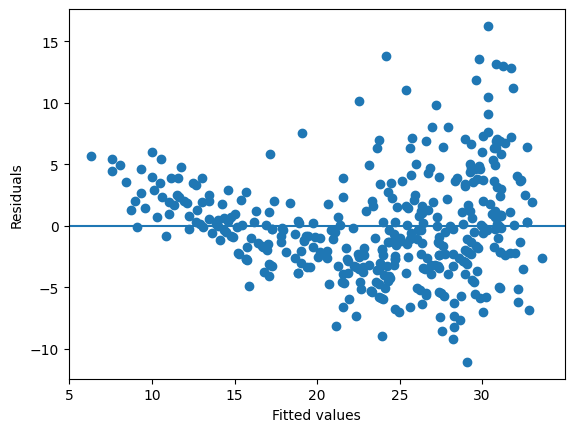

In [40]:
# g) Residuals vs fitted values
import matplotlib.pyplot as plt

plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

In [41]:
# h) Multicollinearity(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

     Variable        VIF
0       const  13.717674
1  horsepower   3.959228
2      weight   3.959228


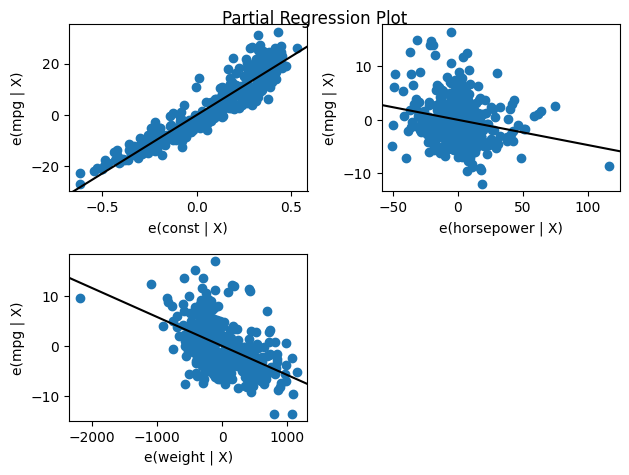

In [42]:
# i) Partial regression(added variable)plots
sm.graphics.plot_partregress_grid(model)
plt.show()

In [43]:
# j) Influential observations
influence = model.get_influence()
(c, p) = influence.cooks_distance
print("Max Cook's Distance:", max(c))

Max Cook's Distance: 0.03729780843034414


In [ ]:
# k) Reliability of coefficint estimates
The reliability of coefficient estimates depends on their standard errors.
Smaller standard errors indicate that the coefficient estimates are more reliable and precise.
If the t-statistics are large and p-values are small, the coefficients are
considered statistically significant and reliable.



In [ ]:
# i) consequences of multicollinearity in regression analysis
Multicollinearity causes large standard errors of regression coefficients,
making them statistically insignificant even when they are important.
Coefficient estimates become unstable and sensitive to small changes in the data.
It becomes difficult to assess the individual effect of correlated predictors, 
reducing the reliability of inference.

# 3.One Way And Two Way Analysis of Variance (ANOVA)


#Que.1)

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [19]:
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
#a)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [51]:
df.groupby("species").sepal_length.describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [22]:
#b)
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<Axes: xlabel='species', ylabel='sepal_length'>

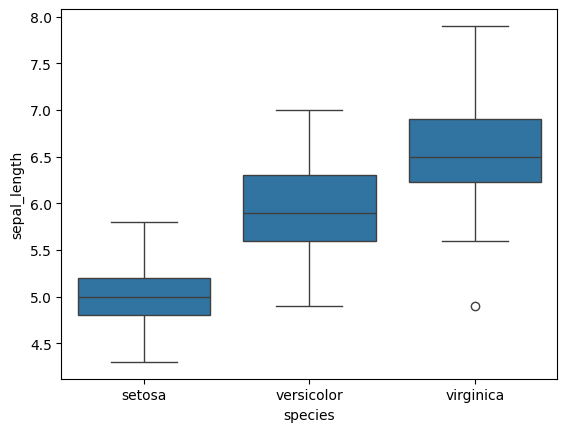

In [23]:
#c)
sns.boxplot(x='species',y='sepal_length',data=df)

In [24]:
#d)
import statsmodels.formula.api as smf
model=smf.ols('sepal_length~C(species)',data=df).fit()
model.summary()

sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(species),2.0,63.212133,31.606067,119.264502,1.669669e-31
Residual,147.0,38.956200,0.265008,NaN,NaN


In [25]:
#e)
anova_lw=sm.stats.anova_lm(model)
print(anova_lw)
anova_pval=anova_lw.loc['C(species)','PR(>F)']
alpha=0.05

if anova_pval>alpha:
    print(f"Pvalue:{anova_pval} so fail to reject H0: All species have equal mean sepal length")
else:
    print(f"Pvalue:{anova_pval} so reject H0: All species have equal mean seapl length")

               df     sum_sq    mean_sq           F        PR(>F)
C(species)    2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual    147.0  38.956200   0.265008         NaN           NaN
Pvalue:1.6696691907702547e-31 so reject H0: All species have equal mean seapl length


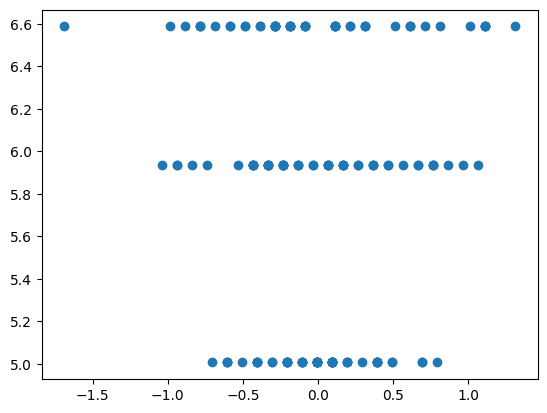

In [26]:
#g)
plt.scatter(model.resid,model.fittedvalues)

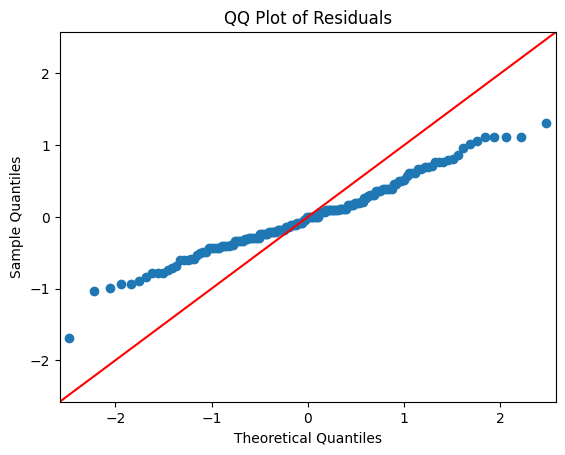

In [27]:
sm.qqplot(model.resid,line='45')
plt.title("QQ Plot of Residuals")
plt.show()

In [28]:
#h)
stat,p_val=ss.shapiro(model.resid)
alpha=0.05
if p_val>alpha:
    print(f"Pvalue:{p_val:.4f} so Fail to reject H0: Residuals following normal distribution")
else:
    print(f"Pvalue:{p_val:.4f} so reject H0: Residuals following normal distribution")

Pvalue:0.2189 so Fail to reject H0: Residuals following normal distribution


In [8]:
#i)
import seaborn as sns
tips=sns.load_dataset("tips")
model_additive=smf.ols('tip~C(day)+C(sex)',data=tips).fit()
anova_additive= sm.stats.anova_lm(model_additive,type=2)
print(anova_additive)

             df      sum_sq   mean_sq         F    PR(>F)
C(day)      3.0    9.525873  3.175291  1.671235  0.173845
C(sex)      1.0    1.594561  1.594561  0.839258  0.360533
Residual  239.0  454.092042  1.899967       NaN       NaN


In [ ]:
#j) Interpretation
#1) ANOVA tests whether mean Sepal Length
#2) Significant result indicates species have different mean Sepal Length
#3) Tukey test identifies which species differ

In [69]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(df.sepal_length,df.species))

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93   0.0 0.6862 1.1738   True
    setosa  virginica    1.582   0.0 1.3382 1.8258   True
versicolor  virginica    0.652   0.0 0.4082 0.8958   True
---------------------------------------------------------


#Q.2)

In [29]:
#a)
n=30
mu1,mu2,mu3 = 10,20,30
sig=10

#b)
G1=np.random.normal(mu1,sig,n)
G2=np.random.normal(mu2,sig,n)
G3=np.random.normal(mu3,sig,n)

In [30]:
#c)
df2=pd.DataFrame({"Y":np.concatenate([G1,G2,G3]),
"X":np.repeat(["G1","G2","G3"],n,)})
df2.head()

,Y,X
0,19.390207,G1
1,10.172151,G1
2,26.232704,G1
3,13.318116,G1
4,11.496358,G1


In [32]:
model2=smf.ols('Y~C(X)',data=df2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     45.60
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           2.85e-14
Time:                        18:22:33   Log-Likelihood:                -332.30
No. Observations:                  90   AIC:                             670.6
Df Residuals:                      87   BIC:                             678.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.8636      1.803      6.024      0.000       7.279      14.448
C(X)[T.G2]     9.2600      2.550      3.631      0.000       4.191      14.329
C(X)[T.G3]    24.1385      2.550      9.465      0.000      19.069      29.208
==============================================================================
Omnibus:                        2.856   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                2.165
Skew:                          -0.311   Prob(JB):                        0.339
Kurtosis:                       3.438   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#d)
anova_1w2=sm.stats.anova_lm(model2)
print(anova_1w2)
anova_pval2=anova_1w2.loc['C(X)','PR(>F)']
aqlpha=0.05

if anova_pval2>alpha:
    print(f"Pval:{anova_pval} so Fail to reject H0: All group have equal mean")
else:
    print(f"Pvalue:{anova_pval} so reject H0: All group have equal mean")

            df       sum_sq      mean_sq          F        PR(>F)
C(X)       2.0  8897.819878  4448.909939  45.599666  2.848875e-14
Residual  87.0  8488.114003    97.564529        NaN           NaN
Pvalue:1.6696691907702547e-31 so reject H0: All group have equal mean


#Que.3)

In [45]:
#a) Load dataset
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
tips=sns.load_dataset("tips")
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [35]:
#b) Levels of factors
print(tips['day'].unique())
print(tips['sex'].unique())

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
['Female', 'Male']
Categories (2, object): ['Male', 'Female']


In [36]:
#c)
tips.groupby(['day','sex'])['tip'].mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13132\2030497538.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['day','sex'])['tip'].mean()


day   sex   
Thur  Male      2.980333
      Female    2.575625
Fri   Male      2.693000
      Female    2.781111
Sat   Male      3.083898
      Female    2.801786
Sun   Male      3.220345
      Female    3.367222
Name: tip, dtype: float64

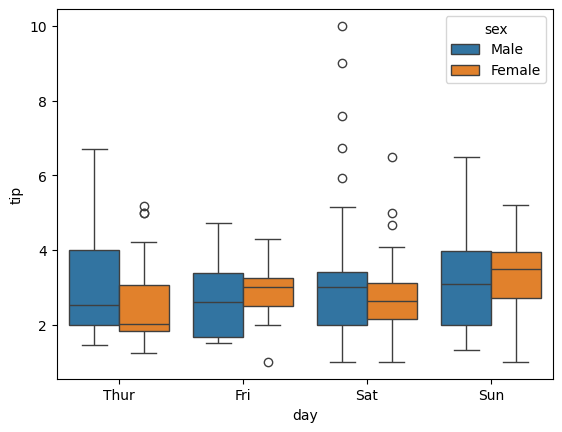

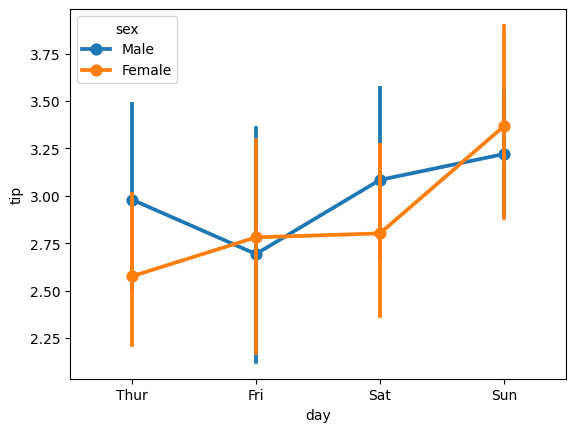

In [38]:
#d)
import matplotlib.pyplot as plt
sns.boxplot(x='day',y='tip',hue='sex',data=tips)
plt.show()
sns.pointplot(x='day',y='tip',hue='sex',data=tips)
plt.show()

#e) Hypotheses
Day:
H0: Mean tip is same for all days
H1:Mean tip differs for at least one day

Sex: 
H0:Mean tip for males and females is equal
H1:Mean tip differs by sex

Day x Sex :
H0: No interaction between day and sex
H1:interaction exists

In [46]:
#f)
model_inter=smf.ols('tip~C(day)*C(sex)',data=tips).fit()


In [47]:
#g) 
anova_inter=sm.stats.anova_lm(model_inter,type=2)
print(anova_inter)

                  df      sum_sq   mean_sq         F    PR(>F)
C(day)           3.0    9.525873  3.175291  1.660444  0.176251
C(sex)           1.0    1.594561  1.594561  0.833839  0.362097
C(day):C(sex)    3.0    2.785891  0.928630  0.485606  0.692600
Residual       236.0  451.306151  1.912314       NaN       NaN


In [48]:
#h)
anova_inter.loc['C(day):C(sex)']

df         3.000000
sum_sq     2.785891
mean_sq    0.928630
F          0.485606
PR(>F)     0.692600
Name: C(day):C(sex), dtype: float64

In [49]:
#i) Additive(no-interaction) model
model_add=smf.ols('tip~C(day)+ C(sex)',data=tips).fit()

In [50]:
#j) 
sm.stats.anova_lm(model_add,model_inter)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,239.0,454.092042,0.0,NaN,NaN,NaN
1,236.0,451.306151,3.0,2.785891,0.485606,0.6926


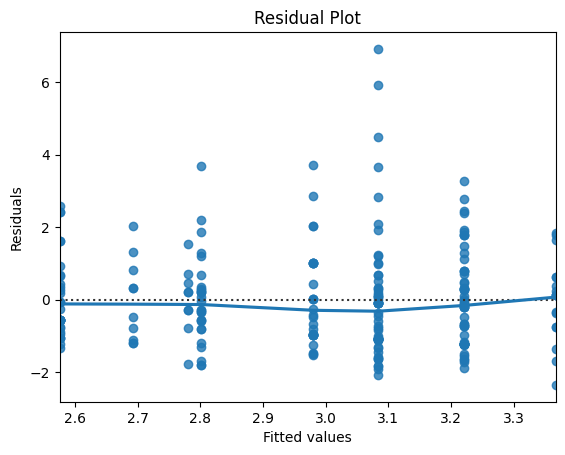

In [52]:
#k) Residual diagnostics
plt.figure()
sns.residplot(x=model_inter.fittedvalues,y=model_inter.resid,lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

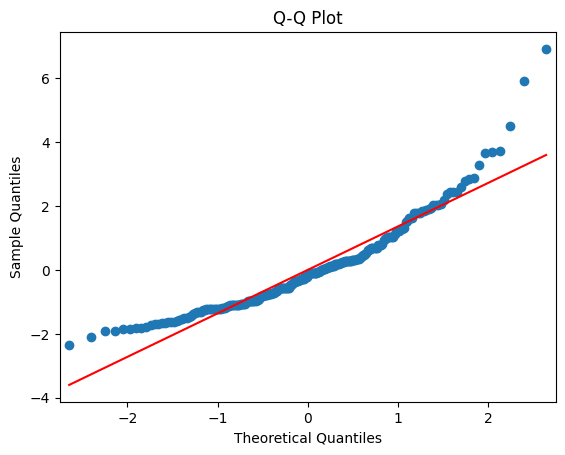

In [56]:
# Normal Q-Q Plot
sm.qqplot(model_inter.resid,line='s')
plt.title("Q-Q Plot")
plt.show()          

#Conclusion
#1)check p-values of Day,Sex,and Day x Sex
#2)if interaction significant-interpret combined effect
#3)if not-interpret main effects only
